In [1]:
#installing required packages
# !pip install streamlit requests python-dotenv
# !pip install requests pandas pymongo psycopg2-binary

# Make sure the kernel is base(python 3.13.5)

In [2]:
# testing the functions in get_data.py
from get_data import *


# clear the database
deleted = clear_all_books()
print(f"Cleared database: deleted {deleted} books")
print(f"Current count: {count_books()}")
print(f"Current book count in database: {count_books()}")


Cleared database: deleted 5125 books
Current count: 0
Current book count in database: 0


In [3]:
# # get the available types of NYT best seller lists  
# from get_data import *

# lists = get_lists_names()
# df_lists = pd.DataFrame(lists)
# print(f"\nFound {len(df_lists)} lists")
# print(df_lists[['list_name', 'list_name_encoded']].head(10))

In [4]:
# store hardcover-fiction books information in a dataframe
from get_data import *

deleted = clear_all_books()

results = get_best_sellers_by_list('hardcover-fiction')
count = store_books_in_mongo(results, 'hardcover-fiction')
print(f"\nStored {count} books in MongoDB")

hard_cover_df = get_books_by_list('hardcover-fiction')

df = get_all_books()
df_sorted = df.sort_values('weeks_on_list', ascending=False)

df_sorted[['title', 'author', 'weeks_on_list', 'list_name', 'rank']]



Stored 15 books in MongoDB


,title,author,weeks_on_list,list_name,rank
5,THE SECRET OF SECRETS,Dan Brown,10,hardcover-fiction,6
4,ALCHEMISED,SenLinYu,8,hardcover-fiction,5
10,QUICKSILVER,Callie Hart,6,hardcover-fiction,11
11,TWICE,Mitch Albom,6,hardcover-fiction,12
12,THE INTRUDER,Freida McFadden,6,hardcover-fiction,13
6,REMAIN,Nicholas Sparks with M. Night Shyamalan,5,hardcover-fiction,7
9,GONE BEFORE GOODBYE,Reese Witherspoon and Harlan Coben,5,hardcover-fiction,10
1,THE WIDOW,John Grisham,4,hardcover-fiction,2
8,THE CORRESPONDENT,Virginia Evans,3,hardcover-fiction,9
0,THE STRENGTH OF THE FEW,James Islington,1,hardcover-fiction,1


# Sanjana's Research Question
Which publishers have books that appear at the top of the list?

In [5]:
from get_data import *
from datetime import datetime
from dateutil.relativedelta import relativedelta

# TEST CELL 

clear_all_books()

lists = ['hardcover-fiction', 'hardcover-nonfiction', 'trade-fiction-paperback', 'paperback-nonfiction']

# Generate first Sunday of each month from 2019 to 2024
start = datetime(2019, 1, 6)  # First Sunday in Jan 2019
end = datetime(2025, 11, 1)
current = start

dates = []
while current <= end:
    dates.append(current.strftime('%Y-%m-%d'))
    current += relativedelta(months=1)

print(f"Will fetch {len(dates)} months × {len(lists)} lists = {len(dates) * len(lists)} API calls\n")

# Fetch data
for list_name in lists:
    print(f"\nFetching {list_name}...")
    for date in dates:
        data = get_best_sellers_by_list(list_name, date)
        if data:
            count = store_books_in_mongo(data, list_name)
            print(f"  {date}: {count} books")

print(f"\nTotal books: {count_books()}")

Will fetch 82 months × 4 lists = 328 API calls


Fetching hardcover-fiction...
  2019-01-06: 15 books
  2019-02-06: 15 books
  2019-03-06: 15 books
  2019-04-06: 15 books

Fetching hardcover-nonfiction...
  2020-02-06: 15 books
  2020-03-06: 15 books
  2020-04-06: 15 books
  2020-05-06: 15 books
  2020-06-06: 15 books

Fetching trade-fiction-paperback...

Fetching paperback-nonfiction...
  2022-06-06: 15 books
  2022-07-06: 15 books
  2022-08-06: 15 books
  2022-09-06: 15 books
  2022-10-06: 15 books

Total books: 210


In [6]:
# all the books are in a dataframe
df = get_all_books()

# get books that are top 10 only
top_books = df[df['rank'] <= 10]

#finding the individual publishers in the top 10
print(f"Total books in top 10: {len(top_books)}")
print(f"\nPublishers with books in top 10:")
top_books['publisher'].value_counts()

Total books in top 10: 140

Publishers with books in top 10:


publisher
Random House                                 10
One World                                     9
Little, Brown                                 8
Morrow                                        8
Crown                                         8
Penguin                                       7
Back Bay                                      6
Putnam                                        6
Doubleday                                     5
Milkweed Editions                             5
Melcher Media/MCD/Farrar, Straus & Giroux     4
Grand Central                                 3
St. Martin's                                  3
Scribner                                      3
Delacorte                                     3
Bantam                                        3
Flatiron                                      3
Dial                                          3
Dey St.                                       2
Harper                                        2
Penguin Press                 

In [7]:
#  publisher stability
publisher_stats = top_books.groupby('publisher').agg({
    'rank': ['mean', 'std', 'min', 'max'],
    'weeks_on_list': ['mean', 'max'],
    'title': 'count'
}).round(2)

publisher_stats.columns = ['avg_rank', 'rank_std', 'best_rank', 'worst_rank', 'avg_weeks', 'max_weeks', 'num_books']
publisher_stats = publisher_stats.sort_values('rank_std')

print("\nPublisher Analysis:")
publisher_stats


Publisher Analysis:


,avg_rank,rank_std,best_rank,worst_rank,avg_weeks,max_weeks,num_books
publisher,,,,,,,
"Little, Brown & Company",9.00,0.00,9,9,352.50,355,2
Celadon,5.00,0.00,5,5,4.00,6,2
Dial,1.00,0.00,1,1,6.00,10,3
St. Martin's,4.00,1.00,3,5,3.33,6,3
Milkweed Editions,2.80,1.10,2,4,118.40,127,5
"Farrar, Straus and Giroux",9.00,1.41,8,10,328.50,333,2
Harper Perennial,9.00,1.41,8,10,186.00,188,2
Scribner,8.67,1.53,7,10,155.67,457,3
Delacorte,6.00,2.00,4,8,3.67,7,3


In [8]:
#most stable publishers have low std deviation in rank
print("\nMost STABLE publishers:")
publisher_stats[publisher_stats['num_books'] >= 2].head(5)


Most STABLE publishers:


,avg_rank,rank_std,best_rank,worst_rank,avg_weeks,max_weeks,num_books
publisher,,,,,,,
"Little, Brown & Company",9.0,0.0,9,9,352.50,355,2
Celadon,5.0,0.0,5,5,4.00,6,2
Dial,1.0,0.0,1,1,6.00,10,3
St. Martin's,4.0,1.0,3,5,3.33,6,3
Milkweed Editions,2.8,1.1,2,4,118.40,127,5


In [9]:
# Most fluctuating publishers have high std deviation in rank
print("\nMost FLUCTUATING publishers:")
publisher_stats[publisher_stats['num_books'] >= 2].sort_values('rank_std', ascending=False).head(5)


Most FLUCTUATING publishers:


,avg_rank,rank_std,best_rank,worst_rank,avg_weeks,max_weeks,num_books
publisher,,,,,,,
Hanover Square,5.5,4.95,2,9,2.5,3,2
Dutton,7.0,4.24,4,10,2.5,3,2
Anchor,6.5,3.54,4,9,6.0,8,2
Penguin Press,4.5,3.54,2,7,3.5,4,2
Grand Central,7.0,3.46,3,9,10.0,14,3


# Collect Historical Data

In [10]:
from get_data import *
import time

clear_historical_books()

lists = ['hardcover-fiction', 'hardcover-nonfiction', 'trade-fiction-paperback', 'paperback-nonfiction']

# Generate Wednesdays from 2010-2025
dates_to_try = []
current = datetime(2010, 1, 2)  # First Wednesday in 2010
end = datetime(2025, 10, 13)

while current <= end:
    dates_to_try.append(current.strftime('%Y-%m-%d'))
    current += timedelta(days=7)  # Next Wednesday

print(f"Will try {len(dates_to_try)} Wednesdays from 2019-2024")
print("="*60)

start_time = time.time()

for list_idx, list_name in enumerate(lists, 1):
    print(f"\n[{list_idx}/{len(lists)}] {list_name}")
    
    count = 0
    successful = 0
    
    for i, date_str in enumerate(dates_to_try):
        data = get_best_sellers_by_list(list_name, date_str)
        
        if data:
            books_added = store_books_historical(data, list_name)
            count += books_added
            successful += 1
            
            if successful % 50 == 0:
                elapsed = (time.time() - start_time) / 60
                print(f"  {successful} weeks, {count} books | {elapsed:.1f} min")
        
        time.sleep(0.5)
    
    print(f"  ✓ {successful}/{len(dates_to_try)} weeks found, {count} books")

total_time = (time.time() - start_time) / 60
print("="*60)
print(f"COMPLETE! Total: {count_historical_books()} books")
print(f"Time: {total_time:.1f} minutes")

Will try 824 Wednesdays from 2019-2024

[1/4] hardcover-fiction
  50 weeks, 1075 books | 9.9 min
  ✓ 80/824 weeks found, 1525 books

[2/4] hardcover-nonfiction
  50 weeks, 1500 books | 27.0 min
  100 weeks, 2360 books | 37.8 min
  ✓ 116/824 weeks found, 2600 books

[3/4] trade-fiction-paperback
  50 weeks, 1105 books | 50.9 min
  ✓ 60/824 weeks found, 1255 books

[4/4] paperback-nonfiction
  50 weeks, 1120 books | 62.9 min
  ✓ 60/824 weeks found, 1270 books
COMPLETE! Total: 6650 books
Time: 65.5 minutes


In [11]:
df = get_all_historical_books()

# overview of the historical data
print(f"Total books: {len(df)}")
print(f"Unique dates: {df['bestsellers_date'].nunique()}")
print(f"Date range: {df['bestsellers_date'].min()} to {df['bestsellers_date'].max()}")
print(f"\nBooks per list:")
print(df.groupby('list_name').size())
print(f"\nUnique publishers: {df['publisher'].nunique()}")

Total books: 6650
Unique dates: 219
Date range: 2010-04-24 to 2025-06-07

Books per list:
list_name
hardcover-fiction          1525
hardcover-nonfiction       2600
paperback-nonfiction       1270
trade-fiction-paperback    1255
dtype: int64

Unique publishers: 288


## Analysis and Visuals

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = get_all_historical_books()

# Convert date to datetime
df['bestsellers_date'] = pd.to_datetime(df['bestsellers_date'])

print(f"Analyzing {len(df)} books from {df['bestsellers_date'].nunique()} weeks")
print(f"Date range: {df['bestsellers_date'].min().date()} to {df['bestsellers_date'].max().date()}")

Analyzing 6650 books from 219 weeks
Date range: 2010-04-24 to 2025-06-07


In [13]:
# Focus on top 5 rankings to define "top of the list"
top_books = df[df['rank'] <= 5].copy()

print(f"\nBooks in top 5: {len(top_books)}")
print(f"Publishers with top 5 books: {top_books['publisher'].nunique()}")


Books in top 5: 1580
Publishers with top 5 books: 150


In [14]:
# Calculate stability metrics per publisher
publisher_stats = top_books.groupby('publisher').agg({
    'rank': ['mean', 'std', 'count', 'min', 'max'],
    'weeks_on_list': ['mean', 'max'],
    'title': 'nunique'  # Unique books
}).round(2)

publisher_stats.columns = ['avg_rank', 'rank_std', 'appearances', 'best_rank', 
                            'worst_rank', 'avg_weeks', 'max_weeks', 'unique_books']

# Filter: at least 5 appearances in top 5 for meaningful analysis
publisher_stats = publisher_stats[publisher_stats['appearances'] >= 5]
publisher_stats = publisher_stats.sort_values('rank_std')

print(f"\nPublishers with ≥5 top-5 appearances: {len(publisher_stats)}")
print("\nTop 15 publishers:")
print(publisher_stats.head(15))


Publishers with ≥5 top-5 appearances: 67

Top 15 publishers:
                          avg_rank  rank_std  appearances  best_rank  \
publisher                                                              
Gallery/Scout                 4.14      0.38            7          4   
It Books/HarperCollins        1.20      0.45            5          1   
Ecco/HarperCollins            2.20      0.45            5          2   
St. Martin's Press            3.40      0.55            5          3   
HarperOne                     3.00      0.63            6          2   
Grove                         4.38      0.74            8          3   
Dutton                        2.38      0.74            8          2   
Washington Square/Atria       3.83      0.75            6          3   
Sentinel                      1.79      0.79           19          1   
Milkweed Editions             4.36      0.84           14          3   
Mariner/Houghton Mifflin      2.40      0.89            5          2   
Bl

In [15]:
# Most STABLE publishers (low rank_std = consistently at same rank)
print("\n" + "="*60)
print("MOST STABLE PUBLISHERS (stay at consistent ranks)")
print("="*60)
stable = publisher_stats.nsmallest(10, 'rank_std')
print(stable[['avg_rank', 'rank_std', 'appearances', 'unique_books']])


MOST STABLE PUBLISHERS (stay at consistent ranks)
                         avg_rank  rank_std  appearances  unique_books
publisher                                                             
Gallery/Scout                4.14      0.38            7             3
It Books/HarperCollins       1.20      0.45            5             1
Ecco/HarperCollins           2.20      0.45            5             1
St. Martin's Press           3.40      0.55            5             1
HarperOne                    3.00      0.63            6             3
Grove                        4.38      0.74            8             3
Dutton                       2.38      0.74            8             3
Washington Square/Atria      3.83      0.75            6             1
Sentinel                     1.79      0.79           19             4
Milkweed Editions            4.36      0.84           14             1


In [16]:
# Most FLUCTUATING publishers (high rank_std = varying ranks)
print("\n" + "="*60)
print("MOST FLUCTUATING PUBLISHERS (ranks vary widely)")
print("="*60)
fluctuating = publisher_stats.nlargest(10, 'rank_std')
print(fluctuating[['avg_rank', 'rank_std', 'appearances', 'unique_books']])


MOST FLUCTUATING PUBLISHERS (ranks vary widely)
                    avg_rank  rank_std  appearances  unique_books
publisher                                                        
Ballantine              3.47      1.81           17            10
Washington Square       2.78      1.72            9             3
Knopf                   3.36      1.71           22             9
Broadway                2.43      1.66           21             6
It Books                3.50      1.64            6             1
Flatiron                2.93      1.64           14             5
Beacon                  3.88      1.64            8             1
Bantam                  3.29      1.64           14             8
Threshold Editions      2.00      1.58            9             4
Putnam                  2.72      1.56           36            16


### Visuals

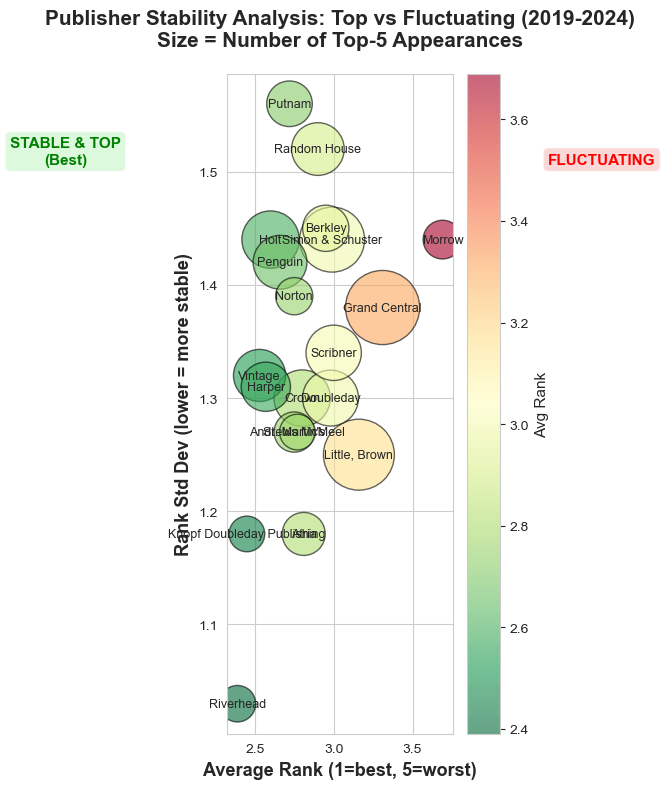

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Visualization 1: Scatter plot - Stability vs Performance
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 20 publishers by appearances
top_20 = publisher_stats.nlargest(20, 'appearances')

scatter = ax.scatter(top_20['avg_rank'], top_20['rank_std'], 
                     s=top_20['appearances']*30, 
                     c=top_20['avg_rank'],
                     cmap='RdYlGn_r', 
                     alpha=0.6, 
                     edgecolors='black',
                     linewidth=1)

# Add labels for each publisher
for idx, row in top_20.iterrows():
    ax.annotate(idx, 
                (row['avg_rank'], row['rank_std']), 
                fontsize=9, 
                ha='center',
                va='center')

ax.set_xlabel('Average Rank (1=best, 5=worst)', fontsize=13, fontweight='bold')
ax.set_ylabel('Rank Std Dev (lower = more stable)', fontsize=13, fontweight='bold')
ax.set_title('Publisher Stability Analysis: Top vs Fluctuating (2019-2024)\nSize = Number of Top-5 Appearances', 
             fontsize=15, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Avg Rank', fontsize=11)

# Add quadrant labels
ax.text(1.3, ax.get_ylim()[1]*0.95, 'STABLE & TOP\n(Best)', 
        fontsize=11, ha='center', color='green', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax.text(4.7, ax.get_ylim()[1]*0.95, 'FLUCTUATING', 
        fontsize=11, ha='center', color='red', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

plt.tight_layout()
plt.show()

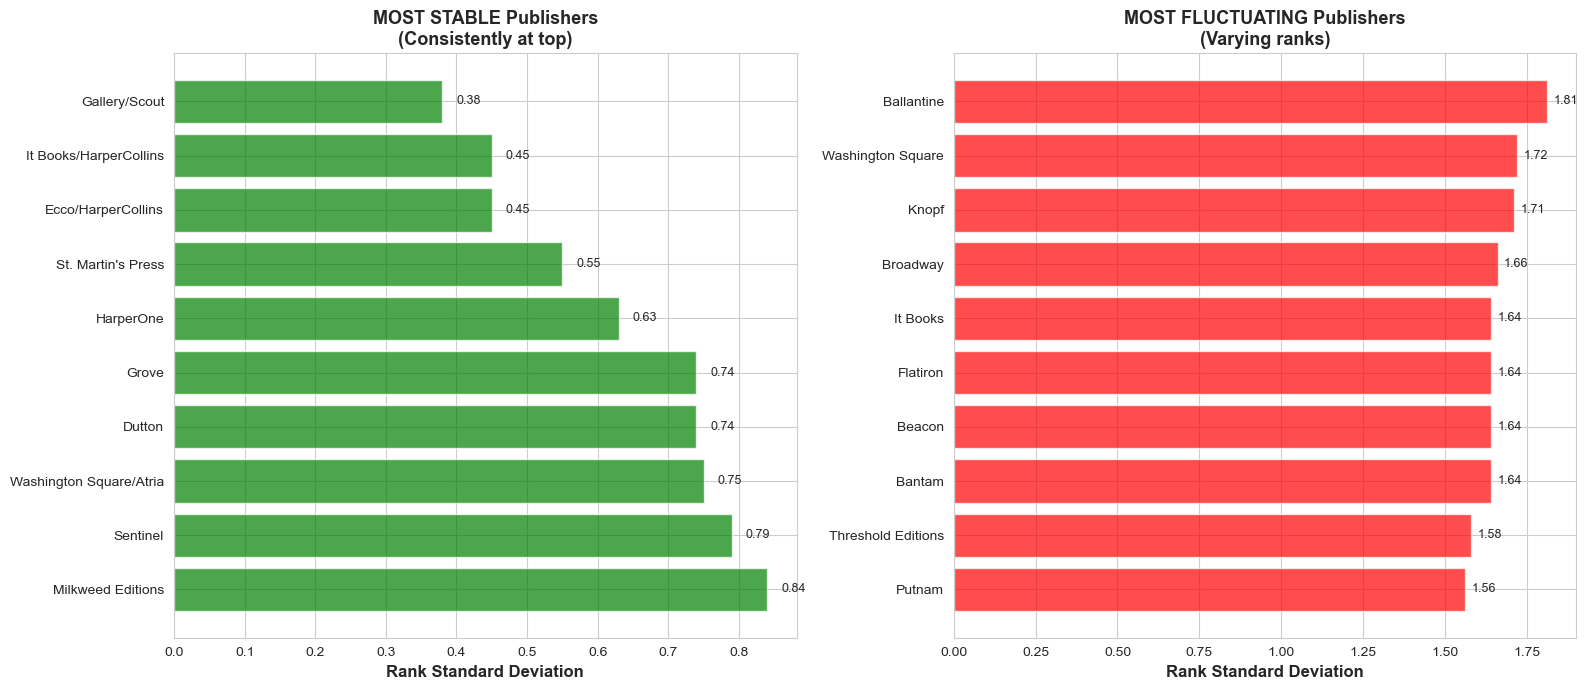

In [18]:
# Visualization 2: Bar charts - Most Stable vs Most Fluctuating
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Most STABLE (top 10)
stable_top10 = publisher_stats.nsmallest(10, 'rank_std')
bars1 = ax1.barh(range(len(stable_top10)), stable_top10['rank_std'], color='green', alpha=0.7)
ax1.set_yticks(range(len(stable_top10)))
ax1.set_yticklabels(stable_top10.index, fontsize=10)
ax1.set_xlabel('Rank Standard Deviation', fontsize=12, fontweight='bold')
ax1.set_title('MOST STABLE Publishers\n(Consistently at top)', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Add values on bars
for i, (idx, row) in enumerate(stable_top10.iterrows()):
    ax1.text(row['rank_std'] + 0.02, i, f"{row['rank_std']:.2f}", 
             va='center', fontsize=9)

# Most FLUCTUATING (top 10)
fluctuating_top10 = publisher_stats.nlargest(10, 'rank_std')
bars2 = ax2.barh(range(len(fluctuating_top10)), fluctuating_top10['rank_std'], color='red', alpha=0.7)
ax2.set_yticks(range(len(fluctuating_top10)))
ax2.set_yticklabels(fluctuating_top10.index, fontsize=10)
ax2.set_xlabel('Rank Standard Deviation', fontsize=12, fontweight='bold')
ax2.set_title('MOST FLUCTUATING Publishers\n(Varying ranks)', fontsize=13, fontweight='bold')
ax2.invert_yaxis()

# Add values on bars
for i, (idx, row) in enumerate(fluctuating_top10.iterrows()):
    ax2.text(row['rank_std'] + 0.02, i, f"{row['rank_std']:.2f}", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

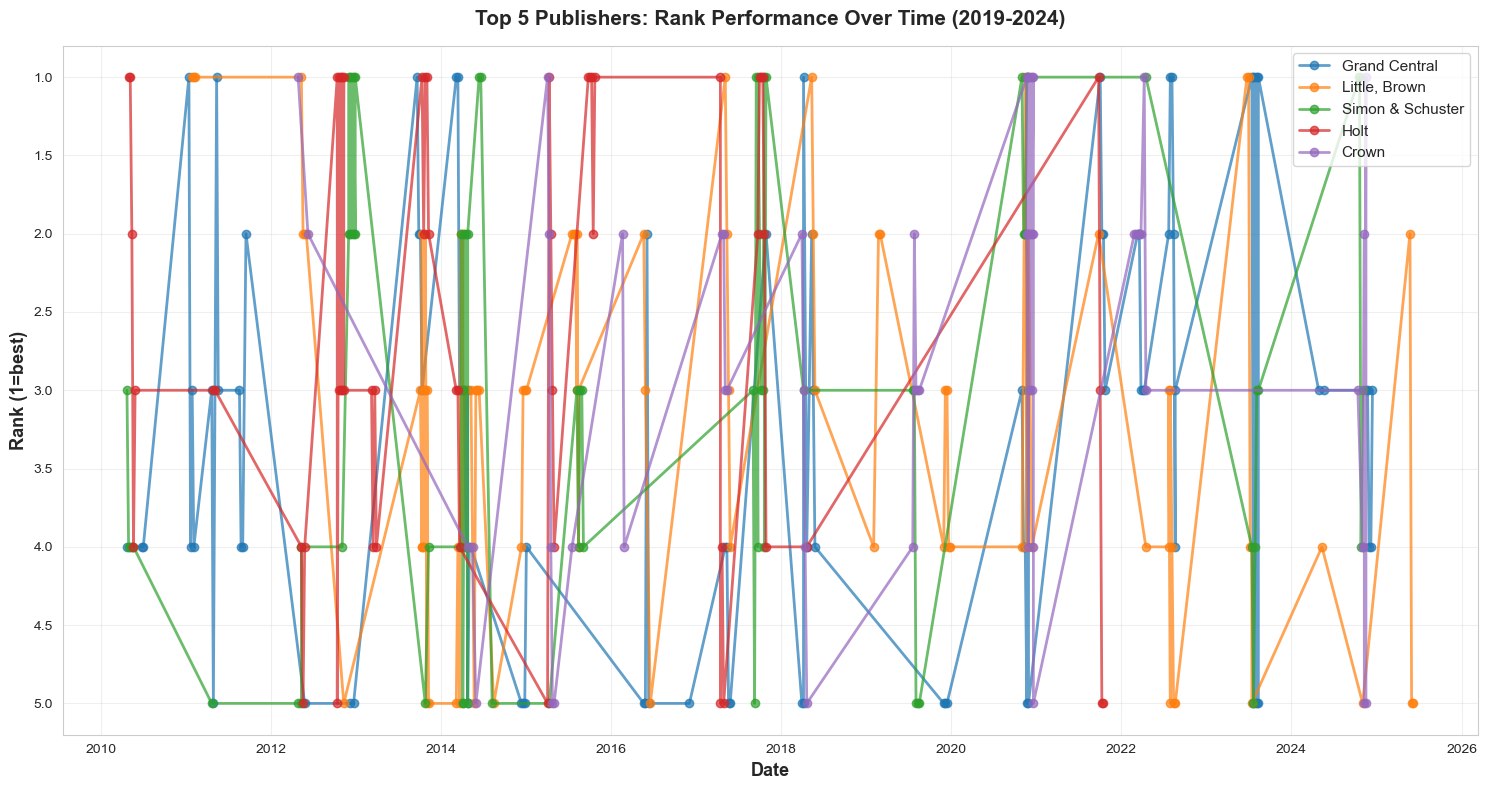

In [19]:
# Visualization 3: Publisher performance over time (top 5 publishers)
top_5_publishers = publisher_stats.nlargest(5, 'appearances').index.tolist()

plt.figure(figsize=(15, 8))

for publisher in top_5_publishers:
    pub_data = top_books[top_books['publisher'] == publisher].copy()
    pub_data = pub_data.sort_values('bestsellers_date')
    
    plt.plot(pub_data['bestsellers_date'], pub_data['rank'], 
             marker='o', label=publisher, alpha=0.7, linewidth=2, markersize=6)

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Rank (1=best)', fontsize=13, fontweight='bold')
plt.title('Top 5 Publishers: Rank Performance Over Time (2019-2024)', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()  # Lower rank = better
plt.tight_layout()
plt.show()

In [20]:
# Visualization 4: Summary table
print("\n" + "="*80)
print("RESEARCH QUESTION SUMMARY")
print("Which publishers have books that remain at the top vs those that fluctuate?")
print("="*80)

print("\nMOST STABLE (Top 5):")
print("-" * 80)
stable_summary = publisher_stats.nsmallest(5, 'rank_std')[['avg_rank', 'rank_std', 'appearances', 'unique_books']]
print(stable_summary.to_string())

print("\n\nMOST FLUCTUATING (Top 5):")
print("-" * 80)
fluctuating_summary = publisher_stats.nlargest(5, 'rank_std')[['avg_rank', 'rank_std', 'appearances', 'unique_books']]
print(fluctuating_summary.to_string())


RESEARCH QUESTION SUMMARY
Which publishers have books that remain at the top vs those that fluctuate?

MOST STABLE (Top 5):
--------------------------------------------------------------------------------
                        avg_rank  rank_std  appearances  unique_books
publisher                                                            
Gallery/Scout               4.14      0.38            7             3
It Books/HarperCollins      1.20      0.45            5             1
Ecco/HarperCollins          2.20      0.45            5             1
St. Martin's Press          3.40      0.55            5             1
HarperOne                   3.00      0.63            6             3


MOST FLUCTUATING (Top 5):
--------------------------------------------------------------------------------
                   avg_rank  rank_std  appearances  unique_books
publisher                                                       
Ballantine             3.47      1.81           17            10


In [22]:
import json
from pymongo import MongoClient

# --- MongoDB Connection Setup ---
MONGO_URI = "mongodb://localhost:27017/" 
DATABASE_NAME = "nyt_bestsellers"
COLLECTION_NAME = "books_historical"

client = MongoClient(MONGO_URI) 
db = client[DATABASE_NAME]
collection = db[COLLECTION_NAME]
# -------------------------------------------------------------

file_name = "books_historical (1).json"

# 1. CLEAR THE DATABASE to ensure a clean, full import
deleted_count = collection.delete_many({})
print(f"Database cleared. Deleted {deleted_count.deleted_count} documents.")

current_count = collection.count_documents({})
print(f"Count BEFORE loading (should be 0): {current_count}")

try:
    with open(file_name, 'r') as f:
        data = json.load(f)
    
    # 2. FIX: Iterate and REMOVE the problematic _id field from every document
    for doc in data:
        if '_id' in doc:
            del doc['_id']

    if data:
        # 3. Insert the now-clean data
        result = collection.insert_many(data)
        print(f"✅ Successfully inserted {len(result.inserted_ids)} records.")
    else:
        print("❌ Error: JSON file was empty or incorrectly formatted.")

except FileNotFoundError:
    print(f"❌ Error: File '{file_name}' not found. Check the file location.")
except Exception as e:
    print(f"❌ An unexpected error occurred during insertion: {e}")

# --- Final Verification ---
final_count = collection.count_documents({})
print(f"Count AFTER loading: {final_count}")

Database cleared. Deleted 6650 documents.
Count BEFORE loading (should be 0): 0
✅ Successfully inserted 5080 records.
Count AFTER loading: 5080
